In [98]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt

In [99]:
df = pd.read_excel('../data/Handball Woman European Data Set.xlsx', index_col=0)

In [100]:
df.tail(6)

,Phase,Match,Team,No,Name,Goals,Shots,%,7m%,7mPGoals,7mPMissed,6mCGoals,6mCMissed,WingGoals,WingMissed,BTGoals,BTMissed,FBGoals,FBMissed,FTOGoals,FTOMissed,9mGoals,9mMissed,YC,RC,2M,2+2,AS,R7,ST,BS,P7,TO,Time,scoring,MVP
1494,FINAL,FRA-NOR,NOR,13,DALE Kari,1,1,100,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,60.000000,0.2,0
1495,FINAL,FRA-NOR,NOR,16,LUNDE Katrine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.283333,0.0,0
1496,FINAL,FRA-NOR,NOR,20,JACOBSEN Marit,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0
1497,FINAL,FRA-NOR,NOR,23,HERREM Camilla,3,4,75,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,37.000000,3.1,0
1498,FINAL,FRA-NOR,NOR,24,SOLBERG-ISAKSEN Sanna Charlotte,1,2,50,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.000000,0.3,0
1499,FINAL,FRA-NOR,NOR,25,BREISTOL Kristine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0


In [101]:
df.dtypes

Phase          object
Match          object
Team           object
No              int64
Name           object
Goals           int64
Shots           int64
%               int64
7m%             int64
7mPGoals        int64
7mPMissed       int64
6mCGoals        int64
6mCMissed       int64
WingGoals       int64
WingMissed      int64
BTGoals         int64
BTMissed        int64
FBGoals         int64
FBMissed        int64
FTOGoals        int64
FTOMissed       int64
9mGoals         int64
9mMissed        int64
YC              int64
RC              int64
2M              int64
2+2             int64
AS              int64
R7              int64
ST              int64
BS              int64
P7              int64
TO              int64
Time          float64
scoring       float64
MVP             int64
dtype: object

# Clustering inicial

In [104]:
simplified_df = df[['Team', 'Goals', 'Shots']]
teams_df = simplified_df.groupby('Team').sum().reset_index()
teams_df

,Team,Goals,Shots
0,CRO,193,339
1,CZE,69,134
2,DEN,209,353
3,ESP,147,261
4,FRA,209,342
5,GER,145,284
6,HUN,156,291
7,MNE,148,262
8,NED,193,356
9,NOR,254,400


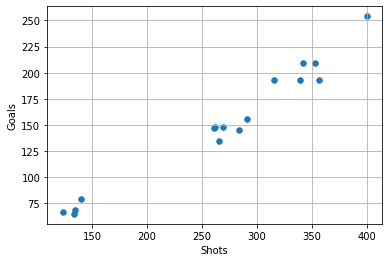

In [105]:
X = teams_df[['Shots', 'Goals']]

plt.scatter(X['Shots'], X['Goals'], s=30)
plt.xlabel('Shots')
plt.ylabel('Goals')
plt.grid()
plt.show()

In [117]:
from sklearn.mixture import GaussianMixture

cv_types = ['spherical', 'tied', 'diag', 'full']
n_components_range = range(1, 10)

BIC = []
lowest_bic = np.infty
best_cv = 'full'
best_k = -1

for cv_type in cv_types:
    for k in n_components_range:
        EM = GaussianMixture(n_components=k, covariance_type=cv_type, init_params='random')
        EM.fit(X)
        
        BIC.append(EM.bic(X))
        
        if BIC[-1] < lowest_bic:
            lowest_bic = BIC[-1]
            best_cv = cv_type
            best_k = k
            
print("Mejor valor K:", best_k)
print("Mejor tipo de Covarianza:", best_cv)

Mejor valor K: 9
Mejor tipo de Covarianza: spherical


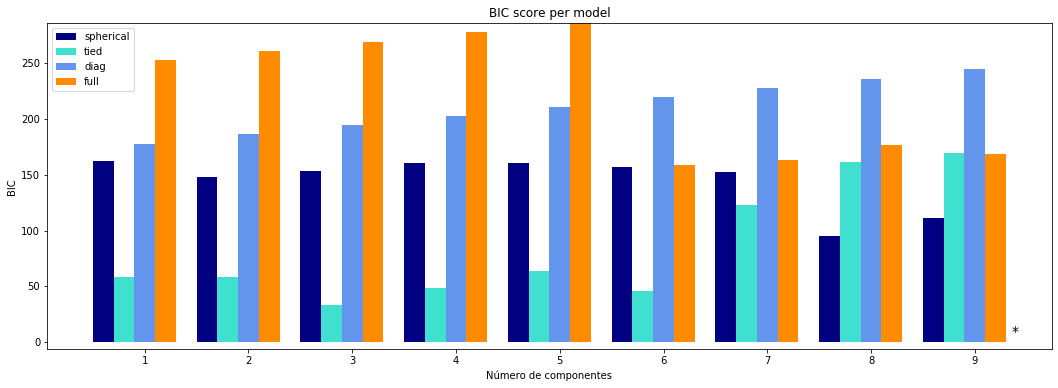

In [119]:
import itertools
import matplotlib.pyplot as plt

color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange'])

plt.figure(figsize=(18, 6))
bars = []
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos,
                        BIC[i * len(n_components_range):(i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([min(BIC) * 1.01 - .01 * max(BIC), max(BIC)])

plt.title('BIC score per model')
plt.xlabel('Número de componentes')
plt.ylabel('BIC')
plt.legend([b[0] for b in bars], cv_types)

xpos = np.mod(np.argmin(bic), len(n_components_range)) + .55 + .2 * np.floor(np.argmin(bic) / len(n_components_range))
plt.text(xpos, min(bic) * 0.97 + .03 * max(bic), '*', fontsize=14)

plt.show()

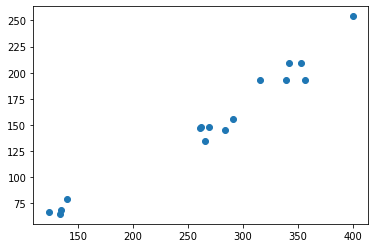

In [121]:
plt.scatter(X.iloc[:,0], X.iloc[:,1])

In [127]:
print(f"Expectation-Maximization with K={best_k} and covariance '{best_cv}'")
EM = GaussianMixture(n_components=best_k, covariance_type=best_cv, init_params='random')
EM.fit(X)
labels =  EM.predict(X)

Expectation-Maximization with K=9 and covariance 'spherical'


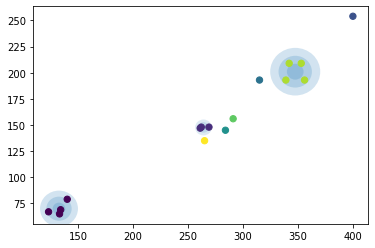

In [128]:
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold', 'darkorange'])

from matplotlib.patches import Ellipse

def plot_EM(model, X, grid=False):
    labels = model.fit(X).predict(X)
    
    ax = plt.gca()
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    
    w_factor = 0.2 / model.weights_.max()
    for pos, covar, w in zip(model.means_, model.covariances_, model.weights_):
        if covar.shape == (2, 2):
            U, s, Vt = np.linalg.svd(covar)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
        elif covar.shape == (2,):
            angle = 0
            width, height = 2 * np.sqrt(covar)
        else:
            angle = 0
            width = height = 2 * np.sqrt(covar)
    
        # Draw the Ellipse
        for nsig in range(1, 4):
            ax.add_patch(Ellipse(pos, nsig * width, nsig * height, angle, alpha=w * w_factor))
    
    if grid:
        plt.grid()
    plt.show()

plot_EM(EM, X)

# Variables significativas y limpieza de datos

In [129]:
for column in df:
    if column in ['Phase', 'Match', 'Team', 'No', 'Name', '%', '7m%', 'YC', 'Time', 'scoring', 'MVP']:
        continue
    print(column, ':', sorted(df[column].unique()))

Goals : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Shots : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19]
7mPGoals : [0, 1, 2, 3, 4, 5, 6, 8, 9]
7mPMissed : [0, 1, 2]
6mCGoals : [0, 1, 2, 3, 4, 5, 6]
6mCMissed : [0, 1, 2, 3]
WingGoals : [0, 1, 2, 3, 4, 5, 6]
WingMissed : [0, 1, 2, 3, 4]
BTGoals : [0, 1, 2, 3, 4]
BTMissed : [0, 1, 2, 4]
FBGoals : [0, 1, 2, 3, 4, 6]
FBMissed : [0, 1, 2, 3]
FTOGoals : [0, 1]
FTOMissed : [0, 1]
9mGoals : [0, 1, 2, 3, 4, 5, 6, 7]
9mMissed : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
RC : [0, 1]
2M : [0, 1, 2, 3]
2+2 : [0]
AS : [0, 1, 2, 3, 4, 5, 6, 7]
R7 : [0, 1, 2, 3, 4]
ST : [0, 1, 2, 3, 4, 5]
BS : [0, 1, 2, 3, 4, 5, 7]
P7 : [0, 1, 2, 3, 4]
TO : [0, 1, 2, 3, 4, 5, 6, 7, 8]


In [131]:
# ['Phase','Match','Team','No','Name','Goals','Shots','%','7m%','7mPGoals','7mPMissed','6mCGoals','6mCMissed','WingGoals','WingMissed','BTGoals','BTMissed','FBGoals','FBMissed','FTOGoals','FTOMissed','9mGoals','9mMissed','YC','RC','2M','2+2','AS','R7','ST','BS','P7','TO','Time','scoring','MVP']

valid_cols_df = df[['Team','7mPGoals','7mPMissed','6mCGoals','6mCMissed','WingGoals','WingMissed','BTGoals','BTMissed','FBGoals','FBMissed','FTOGoals','FTOMissed','9mGoals','9mMissed','RC','2M','AS','R7','ST','BS','P7','TO']]

print(valid_cols_df.shape)
valid_cols_df.dtypes

(1500, 23)


Team          object
7mPGoals       int64
7mPMissed      int64
6mCGoals       int64
6mCMissed      int64
WingGoals      int64
WingMissed     int64
BTGoals        int64
BTMissed       int64
FBGoals        int64
FBMissed       int64
FTOGoals       int64
FTOMissed      int64
9mGoals        int64
9mMissed       int64
RC             int64
2M             int64
AS             int64
R7             int64
ST             int64
BS             int64
P7             int64
TO             int64
dtype: object

In [132]:
teams_df = valid_cols_df.groupby('Team').sum().reset_index()

print(teams_df.shape)
teams_df

(16, 23)


,Team,7mPGoals,7mPMissed,6mCGoals,6mCMissed,WingGoals,WingMissed,BTGoals,BTMissed,FBGoals,FBMissed,FTOGoals,FTOMissed,9mGoals,9mMissed,RC,2M,AS,R7,ST,BS,P7,TO
0,CRO,16,7,49,12,41,32,20,4,10,7,0,0,57,84,2,28,96,25,33,15,42,98
1,CZE,8,5,4,3,22,10,5,3,5,4,0,0,25,40,0,10,22,13,12,3,24,40
2,DEN,20,7,23,15,75,39,21,5,22,7,3,0,45,71,0,25,94,27,39,29,32,84
3,ESP,26,5,24,16,50,39,5,11,16,7,1,1,25,35,1,24,83,31,24,10,21,94
4,FRA,21,11,36,24,56,34,17,4,38,12,0,0,41,48,1,26,90,32,55,20,34,96
5,GER,15,12,24,12,32,27,22,14,20,11,0,0,32,63,0,27,76,27,26,13,30,72
6,HUN,17,6,14,10,46,36,25,13,19,6,0,2,35,62,0,13,80,24,23,11,25,79
7,MNE,20,3,25,5,44,47,4,6,20,7,0,2,35,44,0,17,77,23,28,8,20,77
8,NED,21,7,29,8,51,49,23,16,28,13,0,2,41,68,0,22,105,28,34,15,23,81
9,NOR,35,9,36,14,59,40,44,15,47,18,0,0,33,50,0,18,148,44,34,33,24,75


# Outliers

In [133]:
from sklearn.cluster import KMeans

K = 5
values_df = teams_df.drop('Team', 1)
SSE = []

N = len(teams_df)
for i in range(N):
    X = values_df.drop(i)
    
    km = KMeans(K, 'random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    distances = km.fit_transform(X) # Distancias de cada punto a cada clúster
    distances = np.min(distances, axis=1) # Distancias de cada punto a su clúster (el más cercano, mínima distancia)
    
    SSE.append((distances**2).sum())

Outliers found at: []


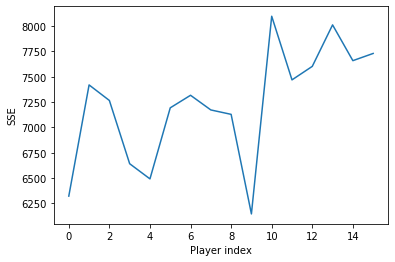

,Team,7mPGoals,7mPMissed,6mCGoals,6mCMissed,WingGoals,WingMissed,BTGoals,BTMissed,FBGoals,FBMissed,FTOGoals,FTOMissed,9mGoals,9mMissed,RC,2M,AS,R7,ST,BS,P7,TO


In [134]:
sigma = np.std(SSE)
mu = np.mean(SSE)
umbral = 3
outliers = []
for i in range(N):
    if abs(SSE[i] - mu) > umbral * sigma:
        outliers.append(i)

print('Outliers found at:', outliers)

plt.plot(SSE)
for index in outliers:
    plt.plot(index, SSE[index], marker='o', color='red')
plt.xlabel('Player index')
plt.ylabel('SSE')
plt.show()


teams_df.iloc[outliers]

Solo hay 16 equipos, por lo que es difícil ver alguno que sea muy distinto. Consideramos que no hay outliers.

# Análisis PCA

Initial PCA with all variables. Not useful to reduce dimensionality, but to obtain the explained variances depending on the number of components taken in a later PCA.

In [135]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

scaler_names = ['Standard', 'MinMax']
scalers = [preprocessing.StandardScaler(), preprocessing.MinMaxScaler()]
n_components = [2, 3]

X = teams_df.drop('Team', 1)

In [136]:
for scaler_name, scaler in zip(scaler_names, scalers):
    X_scaled = scaler.fit_transform(X)
    
    estimator = PCA(n_components=16)
    X_pca = estimator.fit_transform(X_scaled)
    
    explained_variances = estimator.explained_variance_ratio_.cumsum()
    
    for n in n_components:
        print(f"[scaler={scaler_name}, n={n}] Explained variance: {100*explained_variances[n-1]:.2f}% {estimator.explained_variance_ratio_[:n]}")

[scaler=Standard, n=2] Explained variance: 66.43% [0.53026286 0.13406429]
[scaler=Standard, n=3] Explained variance: 74.69% [0.53026286 0.13406429 0.08260185]
[scaler=MinMax, n=2] Explained variance: 65.44% [0.51405908 0.14033117]
[scaler=MinMax, n=3] Explained variance: 75.03% [0.51405908 0.14033117 0.09586426]


In [137]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA
estimator = PCA(n_components = 2)
X_pca = estimator.fit_transform(X_scaled)

teams_df['PC1'] = X_pca[:,0]
teams_df['PC2'] = X_pca[:,1]

explained_variance = estimator.explained_variance_ratio_.cumsum()[-1]
print("Total explained variance:", explained_variance)

Total explained variance: 0.6643271497134642


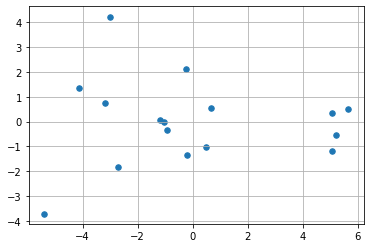

In [138]:
plt.scatter(teams_df['PC1'], teams_df['PC2'], s=30)
plt.grid()
plt.show()

## Results

Explained variance with different configurations

| Scaler   | # Components | Explained variance | Variance per component   |
|----------|--------------|--------------------|--------------------------|
| Standard | 2            | ~65%               | [53.03%, 13.41%]         |
| Standard | 3            | ~75%               | [53.03%, 13.41%, 8.26%] |
| MinMax   | 2            | ~65%               | [51.41%, 14.03%]         |
| MinMax   | 3            | ~75%               | [51.41%, 14.03%, 9.59%] |

**Choice:** StandardScaler with 2 components

## Significant variables analysis

Explained variance per colum

In [139]:
pd.DataFrame(
    np.matrix.transpose(estimator.components_),
    columns=[f'PC-{i+1}' for i in range(X_pca.shape[1])],
    index=X.columns)

,PC-1,PC-2
7mPGoals,-0.245016,-0.217078
7mPMissed,-0.172319,0.148762
6mCGoals,-0.235173,0.202107
6mCMissed,-0.202380,0.141850
WingGoals,-0.239237,-0.088239
WingMissed,-0.223994,-0.150411
BTGoals,-0.222730,-0.189488
BTMissed,-0.151207,-0.370648
FBGoals,-0.238785,-0.258327
FBMissed,-0.227995,-0.232130


# Clustering Expectation-Maximization

In [140]:
from sklearn.mixture import GaussianMixture

X = teams_df[['PC1', 'PC2']]

cv_types = ['spherical', 'tied', 'diag', 'full']
n_components_range = range(1, 10)

BIC = []
lowest_bic = np.infty
best_cv = 'full'
best_k = -1

for cv_type in cv_types:
    for k in n_components_range:
        EM = GaussianMixture(n_components=k, covariance_type=cv_type, init_params='random')
        EM.fit(X)
        
        BIC.append(EM.bic(X))
        
        if BIC[-1] < lowest_bic:
            lowest_bic = BIC[-1]
            best_cv = cv_type
            best_k = k
            
print("Mejor valor K:", best_k)
print("Mejor tipo de Covarianza:", best_cv)

Mejor valor K: 9
Mejor tipo de Covarianza: spherical


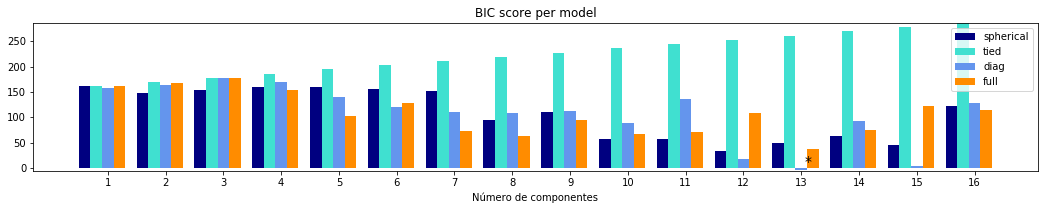

In [71]:
import itertools
import matplotlib.pyplot as plt

color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange'])

plt.figure(figsize=(18, 6))
bars = []
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos,
                        BIC[i * len(n_components_range):(i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([min(BIC) * 1.01 - .01 * max(BIC), max(BIC)])

plt.title('BIC score per model')
plt.xlabel('Número de componentes')
plt.ylabel('BIC')
plt.legend([b[0] for b in bars], cv_types)

xpos = np.mod(np.argmin(BIC), len(n_components_range)) + .55 + .2 * np.floor(np.argmin(BIC) / len(n_components_range))
plt.text(xpos, min(BIC) * 0.97 + .03 * max(BIC), '*', fontsize=14)

plt.show()

In [72]:
EM = GaussianMixture(n_components=best_k, covariance_type=best_cv, init_params='random')
EM.fit(X)
labels =  EM.predict(X)

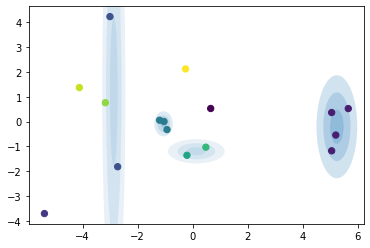

In [74]:
plot_EM(EM, teams_df[['PC1', 'PC2']])

# Clustering K-Means (old)

In [406]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
datanorm = min_max_scaler.fit_transform(sum_df[['Goals', 'Shots']])

NameError: name 'sum_df' is not defined

In [151]:
# parameters
init = 'random' # initialization method 

# to run 10 times with different random centroids 
# to choose the final model as the one with the lowest SSE
iterations = 10

# maximum number of iterations for each single run
max_iter = 300 

# controls the tolerance with regard to the changes in the 
# within-cluster sum-squared-error to declare convergence

tol = 1e-04 

 # random seed
random_state = 0

from sklearn.cluster import KMeans
from sklearn import metrics

distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(i, init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(datanorm)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(datanorm, labels))

C:\Users\anton\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass init=random as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


NameError: name 'datanorm' is not defined

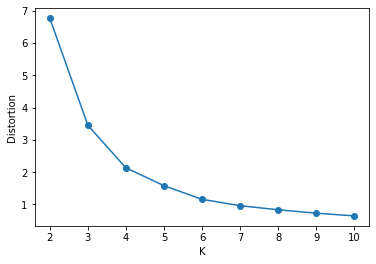

In [25]:
import matplotlib.pyplot as plt
plt.plot(range(2,11), distortions, marker='o')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

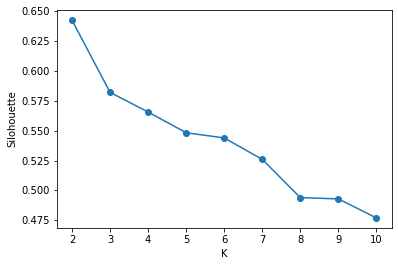

In [27]:
plt.plot(range(2,11), silhouettes , marker='o')
plt.xlabel('K')
plt.ylabel('Silohouette')
plt.show()

In [28]:
k = 10

km = KMeans(k, init, n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km = km.fit_predict(datanorm)

c:\users\alberto\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass init=random as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [29]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(datanorm, y_km))
      
print('Distortion: %.2f' % km.inertia_)

Silhouette Coefficient: 0.477
Distortion: 0.64


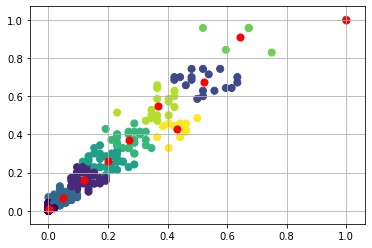

In [31]:
#plotting orginal points with color related to label
plt.scatter(datanorm[:,0], datanorm[:,1], c=km.labels_,s=50)
#plt.scatter(datanorm['Goals'], datanorm['Shots'], c=km.labels_,s=50)
# plotting centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='red',s=50)
# 
plt.grid()
plt.show()